This notebook aims to fetch data from openbb and put it in the data base 

In [8]:
pip install openbb


  Obtaining dependency information for openbb from https://files.pythonhosted.org/packages/e0/7a/7f9c92e87dd75ec7850a441dbf87f2251fd499223561eb05f594aaf490c7/openbb-4.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for openbb-benzinga<2.0.0,>=1.4.0 from https://files.pythonhosted.org/packages/84/c5/a8919b311112122eddc618b20fafadf406dcb24a26c19fe034c1faa45a8a/openbb_benzinga-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for openbb-bls<2.0.0,>=1.1.0 from https://files.pythonhosted.org/packages/79/36/f90eb36fc55a72f288e0e7f84020588da3448f66cb6d07ea700187e45b94/openbb_bls-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for openbb-cftc<2.0.0,>=1.1.0 from https://files.pythonhosted.org/packages/57/ad/7964bea4e184e03fa607cf802dd13a622d835df57cf885f182d43c962c12/openbb_cftc-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for openbb-commodity<2.0.0,>=1.3.0 from https://files.pythonhosted.org/packages/3b/4e/4ca5d60689fe

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
datashader 0.15.2 requires numba, which is not installed.
visualdl 2.5.3 requires protobuf>=3.20.0, which is not installed.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.10.6 which is incompatible.
botocore 1.29.76 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.3.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.8.0 which is incompatible.
paddleocr 2.7.3 requ

In [9]:
import openbb
import pandas as pd
import matplotlib.pyplot as plt

Extensions to add: fixedincome@1.4.1
Extensions to remove: fixedincome@1.4.0

Building...


C:\Users\mahmo\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
# Function to fetch general crypto data
def fetch_crypto_data(symbol):
    """Fetches price, market cap, and volume data for a given cryptocurrency."""
    data = openbb.crypto.price(symbol)
    return data

In [11]:
# Function to fetch tokenomics data
def fetch_tokenomics(symbol):
    """Fetches token supply, distribution, and emissions data."""
    tokenomics = openbb.crypto.tokenomics(symbol)
    return tokenomics

In [12]:
# Function to analyze team and governance
def fetch_team_info(symbol):
    """Fetches team details and governance model."""
    team = openbb.crypto.team(symbol)
    return team

In [13]:
# Function to check security and regulatory risks
def fetch_security_audit(symbol):
    """Checks if the token/project has undergone security audits or regulatory scrutiny."""
    audit = openbb.crypto.audit(symbol)
    return audit

In [14]:
# Function to fetch on-chain metrics
def fetch_onchain_analysis(symbol):
    """Fetches on-chain liquidity, whale activity, and trading volume."""
    onchain = openbb.crypto.onchain(symbol)
    return onchain

In [15]:
# Function to assess financial risks
def fetch_financial_risk(symbol):
    """Analyzes financial risks, such as centralization and smart contract vulnerabilities."""
    risk = openbb.crypto.risk(symbol)
    return risk

In [16]:
# Function to calculate due diligence score
def calculate_due_diligence_score(symbol):
    """Generates a due diligence risk score based on fetched data."""
    score = 0
    
    # Fetch all data
    tokenomics = fetch_tokenomics(symbol)
    team = fetch_team_info(symbol)
    security = fetch_security_audit(symbol)
    onchain = fetch_onchain_analysis(symbol)
    risk = fetch_financial_risk(symbol)
    
    # Evaluate Tokenomics
    if tokenomics['circulating_supply'] / tokenomics['total_supply'] > 0.5:
        score += 2  # Good supply distribution
    
    # Evaluate Team
    if len(team) > 3:
        score += 2  # Well-established team
    
    # Evaluate Security
    if security['audit_passed']:
        score += 3  # Passed security audit
    
    # Evaluate On-chain Metrics
    if onchain['liquidity'] > 1000000:
        score += 2  # Good liquidity
    
    # Evaluate Financial Risk
    if risk['centralization_score'] < 0.3:
        score += 2  # Decentralized structure
    
    return score

In [19]:
from openbb import obb
import pandas as pd

# Define the cryptocurrency symbol and provider
symbol = 'BTC-USD'  # Bitcoin in USD
provider = 'yfinance'  # Yahoo Finance

# Fetch historical price data
historical_data = obb.crypto.price.historical(
    symbol=symbol,
    start_date='2022-01-01',
    end_date='2023-01-01',
    interval='1d',
    provider=provider
)

# Convert to DataFrame
df = historical_data.to_df()

# Display the first few rows
print(df.head())


                    open          high           low         close  \
date                                                                 
2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500   
2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750   
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   

                  volume  
date                      
2022-01-01  2.458267e+10  
2022-01-02  2.795157e+10  
2022-01-03  3.307163e+10  
2022-01-04  4.249468e+10  
2022-01-05  3.685108e+10  


c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


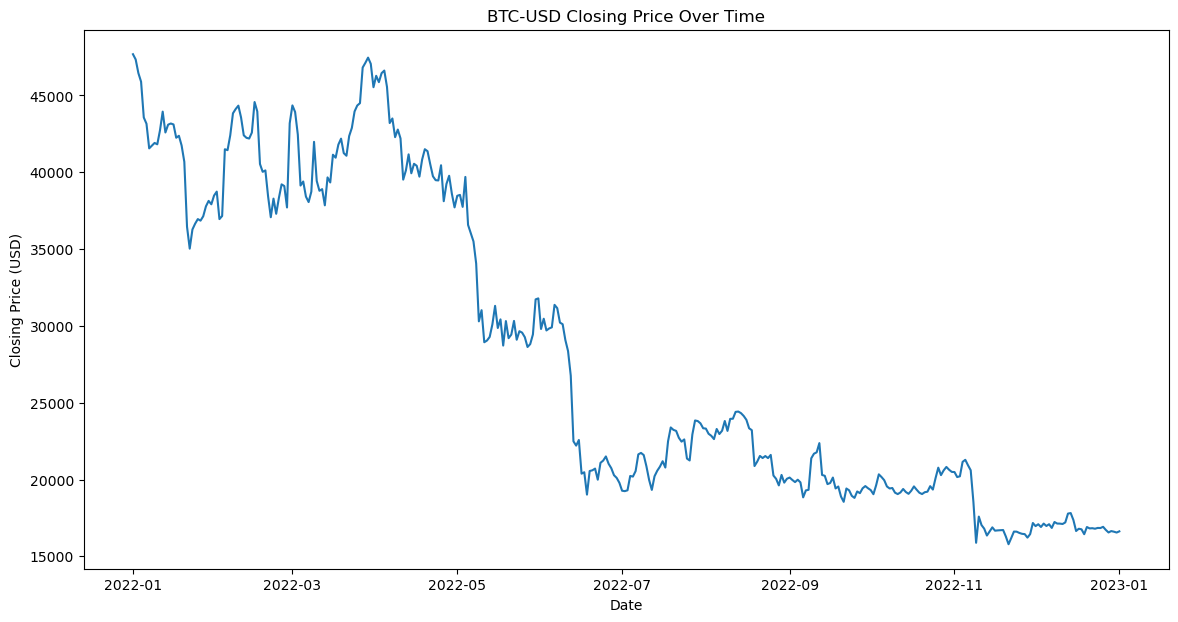

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting closing price over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='close')
plt.title(f'{symbol} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()


In [21]:
def calculate_risk_score(tokenomics, team, security, onchain, risk):
    score = 0
    # Example scoring logic
    if tokenomics['circulating_supply'] / tokenomics['total_supply'] > 0.5:
        score += 2
    if len(team) > 3:
        score += 2
    if security['audit_passed']:
        score += 3
    if onchain['liquidity'] > 1_000_000:
        score += 2
    if risk['centralization_score'] < 0.3:
        score += 1
    return score


c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

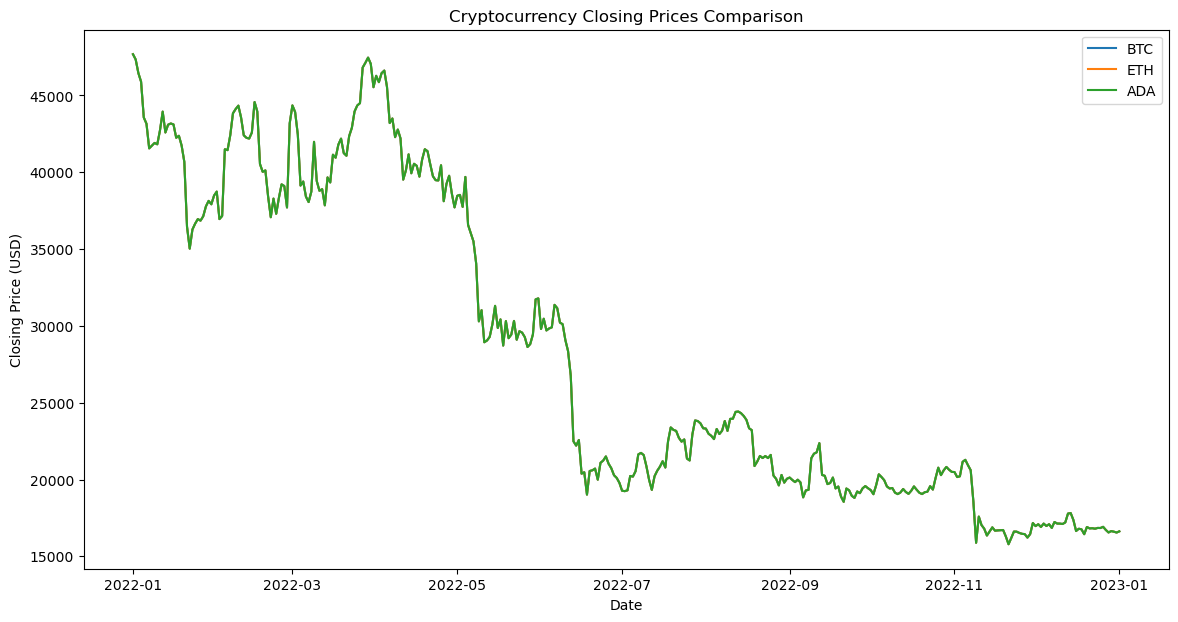

In [23]:
symbols = ['BTC', 'ETH', 'ADA']
comparison_data = {}

for sym in symbols:
    data = historical_data = obb.crypto.price.historical(
    symbol=symbol,
    start_date='2022-01-01',
    end_date='2023-01-01',
    interval='1d',
    provider=provider
)
    comparison_data[sym] = data.to_df()

# Example: Plotting closing prices of multiple cryptocurrencies
plt.figure(figsize=(14, 7))
for sym, data in comparison_data.items():
    sns.lineplot(data=data, x='date', y='close', label=sym)
plt.title('Cryptocurrency Closing Prices Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [27]:
from openbb import obb
def fetch_tokenomics(symbol):
    """Fetches token supply, distribution, and emissions data."""
    try:
        tokenomics = obb.crypto.tokenomics.info(symbol=symbol)
        return tokenomics
    except Exception as e:
        print(f"Error fetching tokenomics data: {e}")
        return None

# Example usage
tokenomics_data = fetch_tokenomics('BTC')
print(tokenomics_data)


Error fetching tokenomics data: 'ROUTER_crypto' object has no attribute 'tokenomics'
None


In [28]:
from openbb_terminal.sdk import openbb


ModuleNotFoundError: No module named 'openbb_terminal'